In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando dataset


In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [24]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Limpeza e Visualização do dataset

In [3]:
dados_nulos = df.isnull().sum()
dados_nulos

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

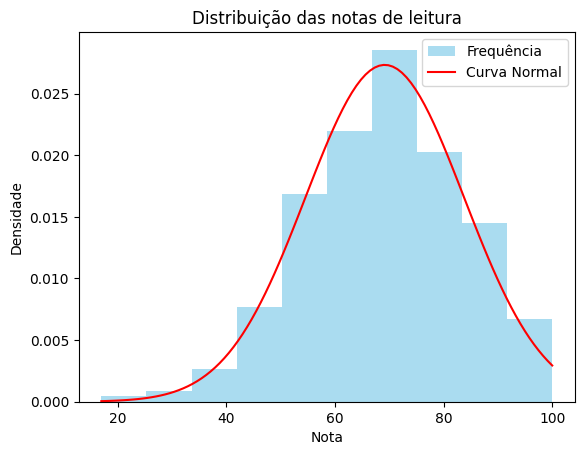

In [4]:
# Dados para o histograma
scores = df['reading score']

# Parâmetros da distribuição normal
media = scores.mean()
desvio_padrao = scores.std()

# Valores para a curva normal
x = np.linspace(scores.min(), scores.max(), 100)
y = stats.norm.pdf(x, media, desvio_padrao)

# Plotar histograma e curva normal
plt.hist(scores, bins=10, color='skyblue', density=True, alpha=0.7, label='Frequência')
plt.plot(x, y, color='red', label='Curva Normal')
plt.title('Distribuição das notas de leitura')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.legend()
plt.show()

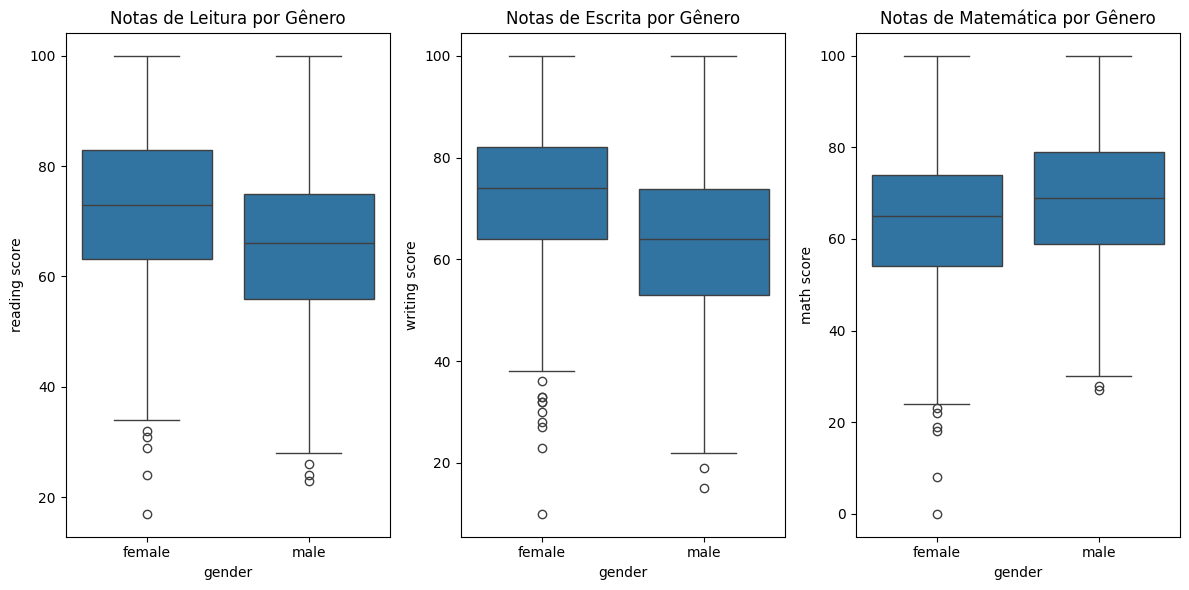

In [5]:

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Boxplot para reading score
sns.boxplot(ax=axes[0], x='gender', y='reading score', data=df)
axes[0].set_title('Notas de Leitura por Gênero')

# Boxplot para writing score
sns.boxplot(ax=axes[1], x='gender', y='writing score', data=df)
axes[1].set_title('Notas de Escrita por Gênero')

# Boxplot para math score
sns.boxplot(ax=axes[2], x='gender', y='math score', data=df)
axes[2].set_title('Notas de Matemática por Gênero')

plt.tight_layout()
plt.show()

In [6]:
# Calcular os limites do IQR para cada coluna numérica
Q1 = df[['math score', 'reading score', 'writing score']].quantile(0.25)
Q3 = df[['math score', 'reading score', 'writing score']].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para remover os outliers
df_novo = df[
    (df['math score'] < limite_inferior['math score']) | (df['math score'] > limite_superior['math score']) |
    (df['reading score'] < limite_inferior['reading score']) | (df['reading score'] > limite_superior['reading score']) |
    (df['writing score'] < limite_inferior['writing score']) | (df['writing score'] > limite_superior['writing score'])
]

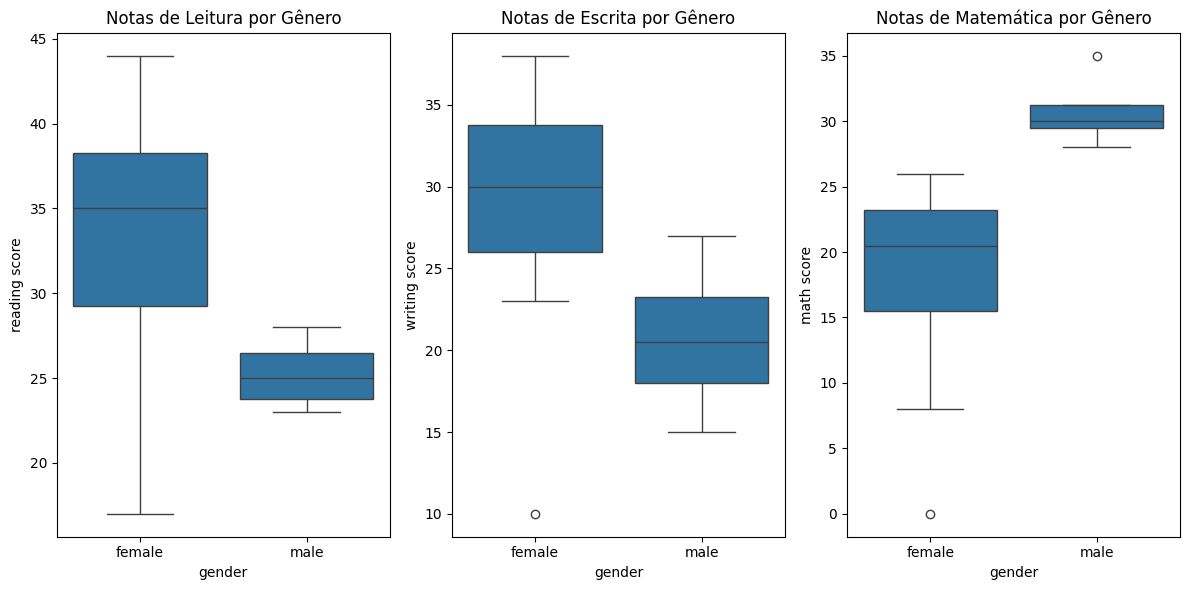

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Boxplot para reading score
sns.boxplot(ax=axes[0], x='gender', y='reading score', data=df_novo)
axes[0].set_title('Notas de Leitura por Gênero')

# Boxplot para writing score
sns.boxplot(ax=axes[1], x='gender', y='writing score', data=df_novo)
axes[1].set_title('Notas de Escrita por Gênero')

# Boxplot para math score
sns.boxplot(ax=axes[2], x='gender', y='math score', data=df_novo)
axes[2].set_title('Notas de Matemática por Gênero')

plt.tight_layout()
plt.show()

## Aplicando testes

### Teste Tstudent

Comparar a média das notas de matemática entre homens e mulheres

In [8]:
homens = df[df['gender'] == 'male']['math score']
mulheres = df[df['gender'] == 'female']['math score']

In [9]:
t, p = stats.ttest_ind(homens, mulheres, equal_var=True)
print(f'T = {t:.2f}, p-valor = {p:.4f}')

T = 5.38, p-valor = 0.0000


In [10]:
homens = df[df['gender'] == 'male']['math score'].mean()
mulheres = df[df['gender'] == 'female']['math score'].mean()

print(f'Média homens: {homens:.2f}')
print(f'Média mulheres: {mulheres:.2f}')

Média homens: 68.73
Média mulheres: 63.63


Como o p-valor é menor que 0.05, rejeitamos a hipótese nula de que as médias são iguais.
Isso indica que existe uma diferença estatisticamente significativa entre as médias dos dois grupos analisados



### Teste de Bartlett

Comparar variância das notas de matemática entre quem fez ou não curso preparatório:

In [20]:
preparou = df[df['test preparation course'] == 'completed']['math score']
nao_preparou = df[df['test preparation course'] == 'none']['math score']

In [19]:
print(f'Variância alunos que se prepararam: {preparou.var():.2f}')
print(f'Variância alunos que não se prepararam: {nao_preparou.var():.2f}')

Variância alunos que se prepararam: 208.65
Variância alunos que não se prepararam: 230.81


In [18]:
estat, p_valor = stats.bartlett(preparou, nao_preparou)
print(f'Estatística: {estat:.2f}, p-valor: {p_valor:.4f}');

Estatística: 1.16, p-valor: 0.2825


Embora a variância dos alunos que não se prepararam seja um pouco maior, o teste de Bartlett resultou em p = 0.2825, assim como p > 0.05, indica que essa diferença não é estatisticamente significativa. Portanto, as variâncias são consideradas iguais.

### Comparação da nota de escrita entre alunos do ensino médio e do mestrado

In [28]:

high_school = df[df['parental level of education'] == 'high school']['writing score']
masters_degree = df[df['parental level of education'] == 'master\'s degree']['writing score']

In [29]:
# Teste t de Student para comparar as médias das notas de escrita
t_stat, t_p_val = stats.ttest_ind(high_school, masters_degree, equal_var=True)
print(f"Teste t de Student: Estatística t = {t_stat:.4f}, p-valor = {t_p_val:.4f}")

Teste t de Student: Estatística t = -6.3609, p-valor = 0.0000


O p-valor é muito menor do que 0.05, o que significa que rejeitamos a hipótese nula.

Logo, existe uma diferença significativa nas médias das notas de escrita entre os alunos de High School e Master's Degree.

In [30]:
# Teste de Bartlett para comparar as variâncias das notas de escrita
bartlett_stat, bartlett_p_val = stats.bartlett(high_school, masters_degree)
print(f"Teste de Bartlett: Estatística = {bartlett_stat:.4f}, p-valor = {bartlett_p_val:.4f}")

Teste de Bartlett: Estatística = 0.0574, p-valor = 0.8106


In [31]:
print("Variância das notas de escrita do ensino médio:", high_school.var())
print("Variância das notas de escrita do mestrado:", masters_degree.var())

Variância das notas de escrita do ensino médio: 198.41276818419675
Variância das notas de escrita do mestrado: 188.53243717124488


O p-valor é maior do que 0.05, o que significa que não rejeitamos a hipótese nula.

Logo, as variâncias das notas de escrita dos alunos de High School e Master's Degree são iguais. Não há diferença significativa nas variâncias entre os dois grupos.